In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(autoload_with=engine)
# reflect the tables
base.metadata.tables

FacadeDict({'measurement': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [6]:
# View all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recentdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
recentdate

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print('The most recent data point')
query1 = text("SELECT * FROM measurement WHERE date = '2017-08-23';")
data1 = engine.execute(query1)
for record in data1:
    print(record)
print('---------------------------------------------------------------')
# Calculate the date one year from the last date in data set.
query_annual = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('The date one year from the last date in data set')
print(query_annual)
print('---------------------------------------------------------------')
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
print('The data and precipitation scores from August23, 2016 to 2017.')
query2 = text("SELECT * FROM measurement WHERE date < '2017-08-24' AND date > '2016-08-22';")
data2 = engine.execute(query2)
dataframe = []
for record2 in data2:
    df = {}
    df["Date"] = record2.date
    df["Precipitation"] = record2.prcp
    dataframe.append(df)
    
Data = pd.DataFrame(dataframe)
Data3 = Data.sort_values('Date')
Data3

The most recent data point
(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)
(7635, 'USC00514830', '2017-08-23', 0.0, 82.0)
(12187, 'USC00519523', '2017-08-23', 0.08, 82.0)
(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)
---------------------------------------------------------------
The date one year from the last date in data set
2016-08-23
---------------------------------------------------------------
The data and precipitation scores from August23, 2016 to 2017.


,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0.5, 1.0, 'Max Precipitation per Day')

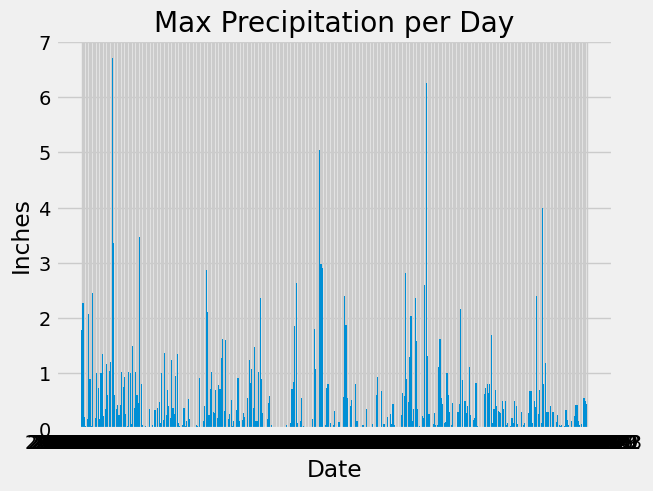

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
datagb = Data3.groupby('Date')['Precipitation'].max().reset_index()
plt.bar(datagb['Date'], datagb['Precipitation'])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Max Precipitation per Day")

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
Data3.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [14]:
USC00519397 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00519397';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00519397.append(df)
dfUSC00519397 = pd.DataFrame(USC00519397)
dfUSC00519397.count()

Date           2724
Tempurature    2724
dtype: int64

In [15]:
USC00513117 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00513117';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00513117.append(df)
dfUSC00513117 = pd.DataFrame(USC00513117)
dfUSC00513117.count()

Date           2709
Tempurature    2709
dtype: int64

In [16]:
USC00514830 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00514830';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00514830.append(df)
dfUSC00514830 = pd.DataFrame(USC00514830)
dfUSC00514830.count()

Date           2202
Tempurature    2202
dtype: int64

In [17]:
USC00517948 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00517948';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00517948.append(df)
dfUSC00517948 = pd.DataFrame(USC00517948)
dfUSC00517948.count()

Date           1372
Tempurature    1372
dtype: int64

In [18]:
USC00518838 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00518838';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00518838.append(df)
dfUSC00518838 = pd.DataFrame(USC00518838)
dfUSC00518838.count()

Date           511
Tempurature    511
dtype: int64

In [19]:
USC00519523 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00519523';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00519523.append(df)
dfUSC00519523 = pd.DataFrame(USC00519523)
dfUSC00519523.count()

Date           2669
Tempurature    2669
dtype: int64

In [20]:
USC00519281 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00519281';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00519281.append(df)
dfUSC00519281 = pd.DataFrame(USC00519281)
dfUSC00519281.count()

Date           2772
Tempurature    2772
dtype: int64

In [21]:
USC00511918 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00511918';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00511918.append(df)
dfUSC00511918 = pd.DataFrame(USC00511918)
dfUSC00511918.count()

Date           1979
Tempurature    1979
dtype: int64

In [22]:
USC00516128 = []
query21 = text("SELECT * FROM measurement WHERE station = 'USC00516128';")
data21 = engine.execute(query21)
for record21 in data21:
    df = {}
    df["Date"] = record21.date
    df["Tempurature"] = record21.tobs
    USC00516128.append(df)
dfUSC00516128 = pd.DataFrame(USC00516128)
dfUSC00516128.count()

Date           2612
Tempurature    2612
dtype: int64

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationlist = []
stationlist.append(('USC00519281', dfUSC00519281['Tempurature'].count()))
stationlist.append(('USC00519397', dfUSC00519397['Tempurature'].count()))
stationlist.append(('USC00513117', dfUSC00513117['Tempurature'].count()))
stationlist.append(('USC00519523', dfUSC00519523['Tempurature'].count()))
stationlist.append(('USC00516128', dfUSC00516128['Tempurature'].count()))
stationlist.append(('USC00514830', dfUSC00514830['Tempurature'].count()))
stationlist.append(('USC00511918', dfUSC00511918['Tempurature'].count()))
stationlist.append(('USC00517948', dfUSC00517948['Tempurature'].count()))
stationlist.append(('USC00518838', dfUSC00518838['Tempurature'].count()))
stationlist 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
templist = []
templist.append(dfUSC00519281['Tempurature'].min())
templist.append(dfUSC00519281['Tempurature'].max())
templist.append(dfUSC00519281['Tempurature'].mean())

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
templist

[54.0, 85.0, 71.66378066378067]

In [26]:
# dfUSC00519281

In [27]:
dfUSC00519281['Tempurature'].value_counts()

72.0    290
73.0    278
71.0    265
74.0    261
70.0    227
75.0    204
69.0    193
76.0    148
68.0    143
67.0    111
77.0    111
78.0     88
66.0     80
65.0     71
79.0     54
80.0     43
64.0     41
62.0     37
63.0     33
81.0     22
61.0     19
60.0     15
82.0     11
58.0      6
57.0      6
59.0      5
56.0      4
83.0      3
54.0      1
84.0      1
85.0      1
Name: Tempurature, dtype: int64

In [28]:
# datagb7 = Data5.groupby('Date')['Precipitation'].max().reset_index()
# plt.bar(datagb['Date'], datagb['Precipitation'])
# plt.xlabel("Date")
# plt.ylabel("Inches")
# plt.title("Max Precipitation per Day")

In [29]:
# USC00519281a = []
# query4 = text("SELECT * FROM measurement WHERE station = 'USC00519281' AND date < '2017-08-19' AND date > '2016-08-17';")
# data4 = engine.execute(query4)
# for record4 in data4:
#     df = {}
#     df["Date"] = record4.date
#     df["Tempurature"] = record4.tobs
#     USC00519281a.append(df)
# dfUSC00519281a = pd.DataFrame(USC00519281a)
# dfUSC00519281a['Tempurature'].value_counts()

74.0    39
75.0    33
76.0    33
77.0    31
78.0    23
70.0    22
72.0    22
79.0    20
69.0    19
73.0    18
71.0    18
67.0    15
68.0    12
80.0    12
65.0     7
62.0     6
81.0     5
66.0     5
63.0     4
64.0     3
59.0     3
82.0     3
60.0     2
61.0     1
83.0     1
Name: Tempurature, dtype: int64

Text(0.5, 4.183333333333314, 'Temperature')

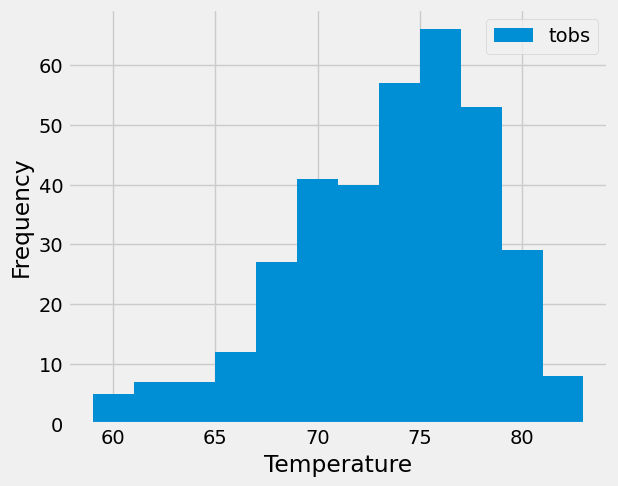

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()